In [1]:
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../.env", override=True)

True

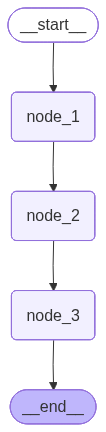

In [ ]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

class OverallState(TypedDict):
    val: int

class PrivateState(TypedDict):
    key: int

def node_1(state: OverallState) -> PrivateState:
    print("---Node 1---")
    return {"key": state['val'] + 1}

def node_2(state: PrivateState) -> PrivateState:
    print("---Node 2---")
    return {"key": state['key'] + 1}

def node_3(state: PrivateState) -> OverallState:
    print("---Node 3---")
    return {"val": state['key'] + 1}

builder = StateGraph(OverallState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", "node_3")
builder.add_edge("node_3", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [3]:
graph.invoke({"val" : 1})

---Node 1---
---Node 2---
---Node 3---


{'val': 4}

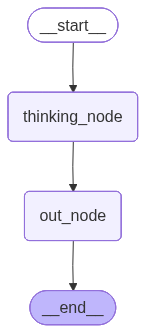

In [4]:
class OverallState(TypedDict):
    inp: str
    out: str
    records: str

def thinking_node(state: OverallState):
    return {"out": "bye", "records": "... his name is Daksh"}

def out_node(state: OverallState):
    return {"out": "bye Daksh"}

graph = StateGraph(OverallState)
graph.add_node("out_node", out_node)
graph.add_node("thinking_node", thinking_node)
graph.add_edge(START, "thinking_node")
graph.add_edge("thinking_node", "out_node")
graph.add_edge("out_node", END)

graph = graph.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
graph.invoke({"inp":"hi"})

{'inp': 'hi', 'out': 'bye Daksh', 'records': '... his name is Daksh'}

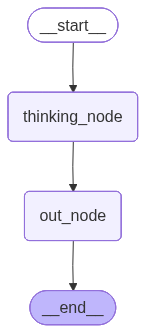

{'out': 'bye Lance'}

In [6]:
class InputState(TypedDict):
    inp: str

class OutputState(TypedDict):
    out: str

class OverallState(TypedDict):
    inp: str
    out: str
    records: str

def thinking_node(state: InputState):
    return {"out": "bye", "records": "... his is name is Lance"}

def out_node(state: OverallState) -> OutputState:
    return {"out": "bye Lance"}

graph = StateGraph(OverallState, input_schema=InputState, output_schema=OutputState)
graph.add_node("out_node", out_node)
graph.add_node("thinking_node", thinking_node)
graph.add_edge(START, "thinking_node")
graph.add_edge("thinking_node", "out_node")
graph.add_edge("out_node", END)

graph = graph.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

graph.invoke({"inp":"hi"})